In [6]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

AttributeError: module 'numpy' has no attribute '__version__'

In [1]:

df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

NameError: name 'pd' is not defined

In [ ]:
df.info()

In [4]:

df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [ ]:

pd.isnull(df).sum()

In [ ]:

df.dropna(inplace=True)

In [ ]:

df['Amount'] = df['Amount'].astype('float')


In [ ]:
df['Amount'].dtypes

In [ ]:
df.columns

In [ ]:

df.rename(columns= {'Shaadi':'Marital_Status'})

In [ ]:

df[['Age','Orders','Amount']].describe()

In [ ]:
b = sns.countplot(x = 'Gender',data = df)

for bars in b.containers:
       b.bar_label(bars)



# Exploratory Data Analysis

### Gender

In [ ]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen)

In [ ]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

### Age

In [ ]:
ax = sns.countplot(data = df, x = 'Age Group',hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

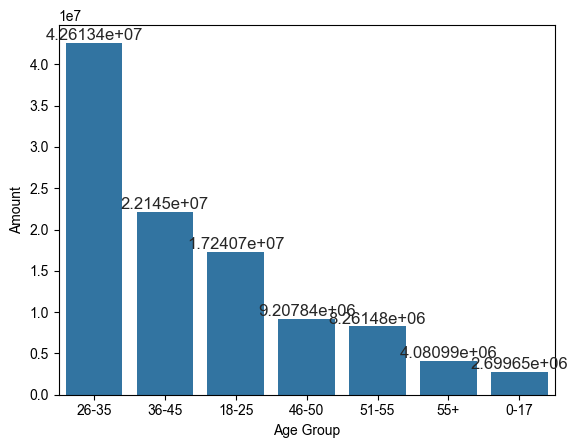

In [5]:

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

n= sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
sns.set_theme(rc={'figure.figsize':(25,16)})

for i in n.containers:
    n.bar_label(i)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### State

In [ ]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set_theme(rc={'figure.figsize':(25,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

In [ ]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### Marital Status

In [ ]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc={'figure.figsize':(20,5)})


for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(6,5)})

m = sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

for bars in m.containers:
     m.bar_label(bars)
     
     

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

### Occupation

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
ax=sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')


for bars in ax.containers:
    ax.bar_label(bars)


*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

### Product Category

In [ ]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(15)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

In [ ]:
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(15)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

In [ ]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))

df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')